In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

### Load and scale the data

In [2]:
feature = pd.read_csv('../Day5/fish_market_feature.csv')
label = pd.read_csv('../Day5/fish_market_label.csv')
X = feature.values
Y = label.values

In [3]:
# normalize the data using sklearn's StandardScaler
# x_scaler = StandardScaler(with_mean=False)
# y_scaler = StandardScaler(with_mean=False)
# Xs = x_scaler.fit_transform(X)
# ys = y_scaler.fit_transform(Y)

In [4]:
X_train, X_val, Y_train, Y_val = [
    scale(d, with_mean=False) for d in  # normalize
    train_test_split(X, Y, test_size=0.1, random_state=69)
]

print(X_train.shape, X_val.shape)

(111, 5) (13, 5)


### Build Model

1) Define a model of three dense hidden layers with ReLU activation functions, plus an final dense layer. The output of the hidden layers should have 32 neurons each.

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [5]:
n_epochs = 3000
batch_size = 62


model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(43, activation='relu'),
    Dense(1, activation='linear'),
])

model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics='mse',
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 128)               1

In [6]:
# train the model (use the train data and validation data from above)
cp_callback = ModelCheckpoint(
    filepath='./checkpoint',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
)

history = model.fit(
    X_train,
    Y_train,
    epochs=n_epochs,
    validation_data=(X_val, Y_val),
    batch_size=batch_size,
    callbacks=[cp_callback],
    verbose=0
)


0.0011982630239799619 0.0011982630239799619


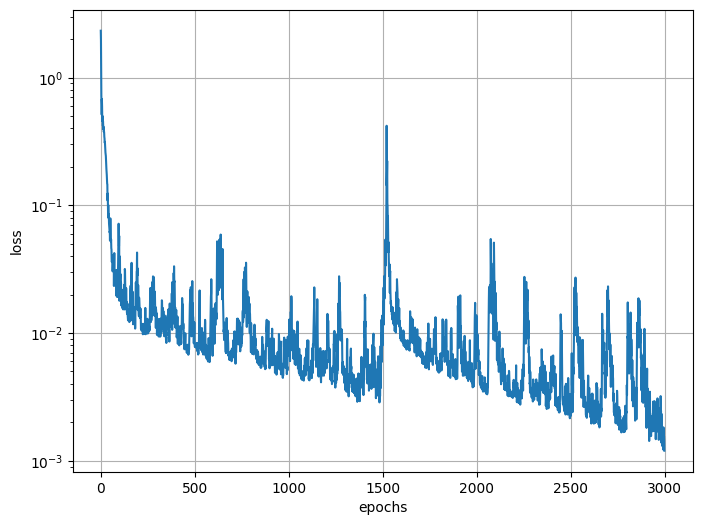

In [7]:
loss_history = history.history['loss']
print(loss_history[-1], min(loss_history))

plt.figure(figsize=(8,6))
plt.semilogy(loss_history)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()


#### Load the testing dataset

In [8]:
X_test = pd.read_csv('../Day5/fish_market_test_feature.csv').values
y_test = pd.read_csv('../Day5/fish_market_test_label.csv').values

In [9]:
# Predict
Xs_test = scale(X_test, with_mean=False)
y_test_scaler = StandardScaler(with_mean=False)
y_test_scaler.fit(y_test)
y_hat = y_test_scaler.inverse_transform(model.predict(Xs_test))
df = pd.DataFrame({'Predicted': y_hat[:, 0], 'Actual': y_test[:, 0]})
df = df.sort_values(by='Predicted')


1/1 [==============================] - 0s 56ms/step


Final MSE: 4110.8 (RMSE 64.1)


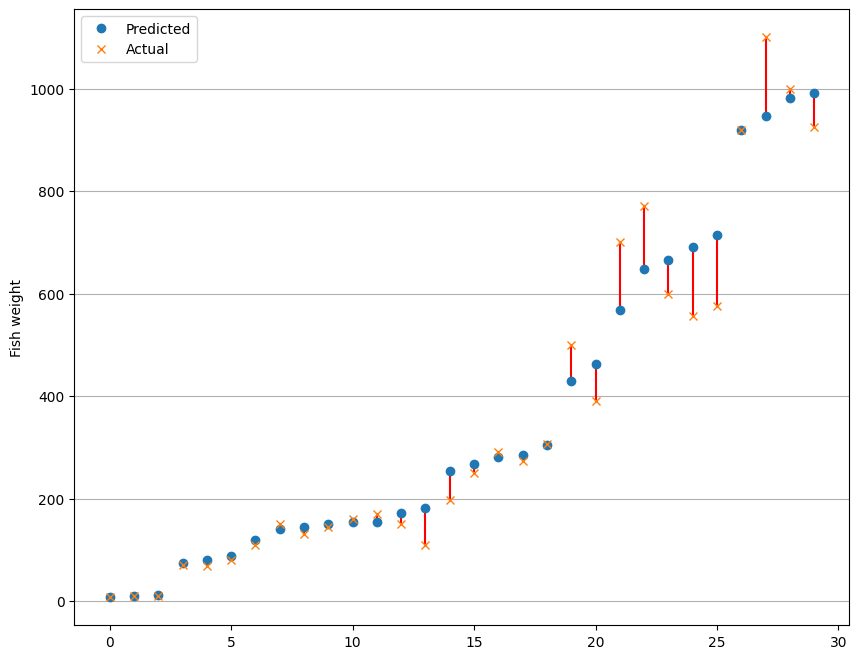

In [10]:
mse = ((df['Actual'] - df['Predicted']) ** 2).mean()
print(f"Final MSE: {mse:.5} (RMSE {np.sqrt(mse):.3})")

xplt = np.arange(len(df))

plt.figure(figsize=(10,8))
plt.plot([xplt, xplt], df.values.T, 'r-')
plt.plot(xplt, df['Predicted'], 'o', label='Predicted')
plt.plot(xplt, df['Actual'], 'x', label='Actual')
plt.ylabel('Fish weight')
plt.grid(axis='y')
plt.legend()
plt.show()
